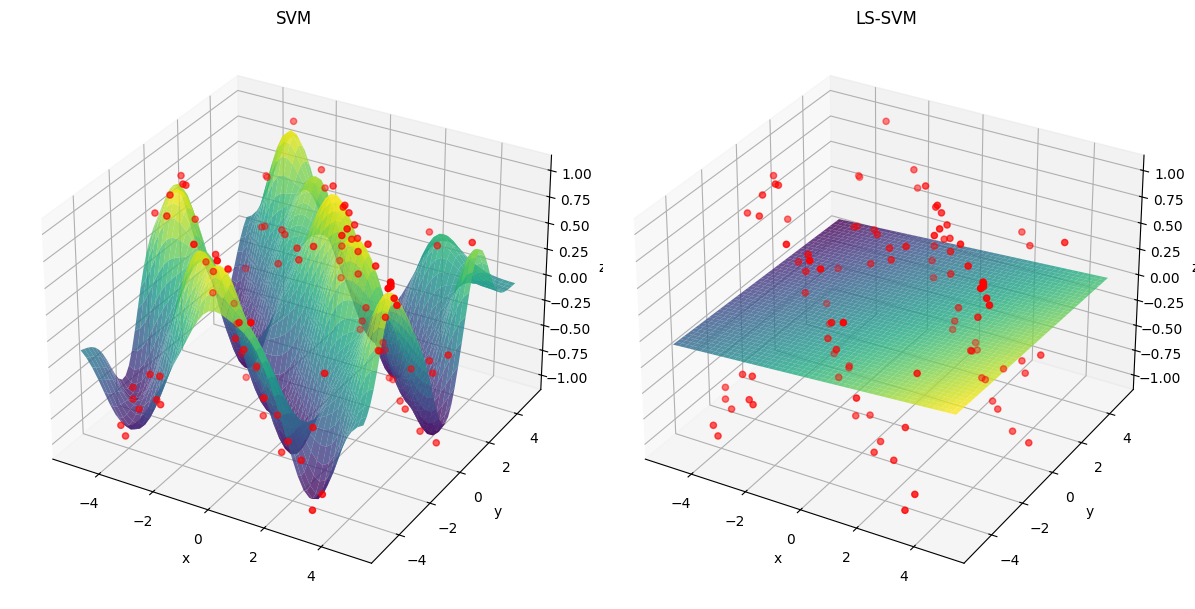

RMSE (SVM): 0.0867
RMSE (LS-SVM): 0.7130
Time taken (SVM): 0.0054 seconds
Time taken (LS-SVM): 0.0015 seconds


In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import Ridge

np.random.seed(0)
x_train = np.random.uniform(-5, 5, 100)
y_train = np.random.uniform(-5, 5, 100)
z_train = np.sin(x_train + y_train)

X_train = np.column_stack((x_train, y_train))

svm = SVR(kernel='rbf', C=1, gamma=1)

start_svm = time()
svm.fit(X_train, z_train)
end_svm = time()

ls_svm = Ridge(alpha=1.0)
start_ls_svm = time()
ls_svm.fit(X_train, z_train)
end_ls_svm = time()

x_grid = np.linspace(-5, 5, 50)
y_grid = np.linspace(-5, 5, 50)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
X_grid = np.column_stack((x_mesh.ravel(), y_mesh.ravel()))

z_svm = svm.predict(X_grid).reshape(x_mesh.shape)
z_ls_svm = ls_svm.predict(X_grid).reshape(x_mesh.shape)

z_svm_train = svm.predict(X_train)
z_ls_svm_train = ls_svm.predict(X_train)

rmse_svm = np.sqrt(mean_squared_error(z_train, z_svm_train))
rmse_ls_svm = np.sqrt(mean_squared_error(z_train, z_ls_svm_train))

fig = plt.figure(figsize=(12, 6))

# SVM
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_mesh, y_mesh, z_svm, cmap='viridis', alpha=0.8)
ax1.scatter(x_train, y_train, z_train, color='r', label='Samples')
ax1.set_title('SVM')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# LS-SVM
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_mesh, y_mesh, z_ls_svm, cmap='viridis', alpha=0.8)
ax2.scatter(x_train, y_train, z_train, color='r', label='Samples')
ax2.set_title('LS-SVM')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.tight_layout()
plt.show()

print(f"RMSE (SVM): {rmse_svm:.4f}")
print(f"RMSE (LS-SVM): {rmse_ls_svm:.4f}")
print(f"Time taken (SVM): {end_svm - start_svm:.4f} seconds")
print(f"Time taken (LS-SVM): {end_ls_svm - start_ls_svm:.4f} seconds")


LS-SVM is faster but may have less precision.